# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

In [1]:
!pip install PyArabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.6 MB/s eta 0:00:00


# Install and Import Needed Libraries

You can use `pyarabic` or any other library to pre-process and clean the Arabic text.

In [2]:
# DS and regex libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from collections import Counter
# Arabic lib:
import pyarabic.araby as araby
import pyarabic.number as number

# Import nltk for stopwords:
import nltk
from nltk.corpus import stopwords # Import stopwords so that we can take them out of our text later.
from nltk.stem.isri import ISRIStemmer # We'll use this module to return the arabic words to their base root form.
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
# Data splitting and Preprocessing:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Modeling modules:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, Bidirectional, SimpleRNN, Lambda,BatchNormalization

# Model performance measure:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Download the Dataset

Please note that you are allowed to take a subset of this dataset, the reason for that is it might take a long time to train the model on.

In [3]:
!kaggle datasets download -d khaledzsa/sanad
!unzip sanad.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/sanad
License(s): unknown
 98% 70.0M/71.4M [00:03<00:00, 30.6MB/s]
100% 71.4M/71.4M [00:03<00:00, 23.0MB/s]
Archive:  sanad.zip
  inflating: sanad.csv               


In [4]:
df = pd.read_csv('/content/sanad.csv')

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [5]:
df.head()

,text,label
0,https://example.com/resource/الشاٌرقة -ْ محمِد...,Culture
1,https://example.com/resource/اَنِطٌلقّتَ ٍفٍيّ...,Culture
2,https://example.com/resource/أُقيًمٌتِ مِساءُ ...,Culture
3,https://example.com/resource/بٍاسُمةَ يًوٌنٍس ...,Culture
4,https://example.com/resource/قُرر اَتحِاد اًلْ...,Culture


In [6]:
df.sample(10)

,text,label
30493,https://example.com/resource/فَتحُتُ ّاِلَسٍلْ...,Sports
13753,https://example.com/resource/يْسعىّ مّستشُفى ِ...,Medical
8951,https://example.com/resource/تعتُزّمٌ ِبوًرٍصة...,Finance
17382,https://example.com/resource/أبٌوظِبٌيُ - مرِي...,Medical
11134,https://example.com/resource/يشًكل ْانَعقَاْد ...,Finance
37347,https://example.com/resource/حْصْلتْ جّاكيس ٌل...,Tech
26847,https://example.com/resource/الِفازَاٌleّ َvaِ...,Religion
26266,https://example.com/resource/تٍتِلخص ّنظرِةٌ ا...,Religion
30667,https://example.com/resource/تٍعّاقَدَ َالمْها...,Sports
20175,https://example.com/resource/أُعلنًت ٌاُلِشٌرط...,Politics


In [7]:
df.tail()

,text,label
39880,https://example.com/resource/أعلّنت شّركٌةً بّ...,Tech
39881,https://example.com/resource/بُتٍاَرٌيًخَ 28ْ ...,Tech
39882,https://example.com/resource/دبَيُ:َ «ُاَلخليج...,Tech
39883,https://example.com/resource/LٌG GًS2ْ9ً0 Coْo...,Tech
39884,https://example.com/resource/تنطًلقٍ اٌليومّ َ...,Tech


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39885 entries, 0 to 39884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39885 non-null  object
 1   label   39885 non-null  object
dtypes: object(2)
memory usage: 623.3+ KB


In [9]:
# Let's explore our data a bit more:
for col in df.columns:
  print(f'Unique values for feature {col} of type {df[col].dtype}:')
  print("Number of unique vlaues:", df[col].nunique())
  print(df[col].unique())
  print(f'The value counts: {df[col].value_counts()}')
  print('-'*100)

Unique values for feature text of type object:
Number of unique vlaues: 39885
['https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً"ْبَعيُدْاًّ عن اٌلسيطرة"ّ ًلِفرقةَ مَسّرُحَ ًاِلطِاٌئف،ّ ْمن ّتٌأٌليُف فُهًدِ ّرّدِةَ الحاّرثي، ّوٌإُخراًج َسٍاٌمَي ًصّاَلٍحٍ الزَهرانيّ،ْ ٌوُذّلكّ فٌيً َرٌابعٍةٌ ٌليالي ِالدورْةَ اَلأوٌلى ٌمن مًهرًجِانٌ اْلشْارِقُة لّلّمَسُرٌحْ الخليجي ٌ.تًبًدَأْ اْلْمسرٍحيٍة بثًلاٍثّة َأشخاٍصٍ ٍيجٍلْسِونَ ُفي قاعةِ مّكتبةِ،ٌ ًيِنهمُك كٌل َمْنهٌمٌ ّفي ُالقرِاءة بْشغَف،ِ ُثُم يبِدأِوْن ًفيَ الٍحوٌاُر لنٍكُتشُفُ ُأِنهمّ كاْنوّاٌ ْيِقُرَأّونْ ِروٍاياّت لُأستُاّذهم ًالكِاتِب اّلمٌبدَعَ ُالٍذيٍ مِاْت ُوْتِرْك ُرِوايٌاتَ فريَدَةً،ٍ ُرٌسم فْيهًا ِشْخُصًياُت ٍغاية فُي الُدُقٌة، ٌويتحدٌثونّ ْعنُ ضرورة تكِرٍيمَ ِأستْاّذُهًم،ٌ ويٍتِفِقون ُعُلْىّ طرٍيقّة ًخاصةّ َلًلتكرّيم وُهيٌ ِإُخرٍاّج ُشِخصِيٌاتَه ًمنُ ْرِواياٍتها ٍلٍتَعٍيٍش في ّاٍلوْاقًع، وِيًنتِقّونً شِخُ

In [10]:
# Let's try to get the max length and minimum length texts:
# By the way this is what it looks like when you get a guy that only knew java and c (NORMAL C) before entering the bootcamp,
# There is probably a way easier way of doing this that I don't know..
# Max len:
max_len_text = 0
for row in df['text']:
  text_length = len(row)
  if text_length > max_len_text:
    max_len_text = text_length
# Min len:
min_len_text = max_len_text
for row in df['text']:
  text_length = len(row)
  if text_length < min_len_text:
    min_len_text = text_length

print(f'The maximum length of a text in the df: {max_len_text}')
print(f'The minimum length of a text in the df: {min_len_text}')

The maximum length of a text in the df: 7624
The minimum length of a text in the df: 176


# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **Arabic stopwords loading**:
   We load a list of Arabic stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   - **Removing links (URLs)**: Any URLs present in the text are removed as they are not meaningful for classification purposes.
   - **Removing special characters and punctuation**: This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   - **Removing Arabic diacritics (Tashkeel) and elongated letters (Tatweel)**: Diacritical marks and elongated letters are stripped out to standardize the text.
   - **Removing Arabic stopwords**: Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   - **Stemming or Lemmmatization**: Either stemming or lemmatization is applied to reduce words to their root or base form.
   - **Normalizing Hamza**: Any variation of the Hamza character is normalized for consistency.

   **Note:** Most of these you can do using the library [PyArabic](https://pyarabic.readthedocs.io/ar/latest/README.html#features)

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

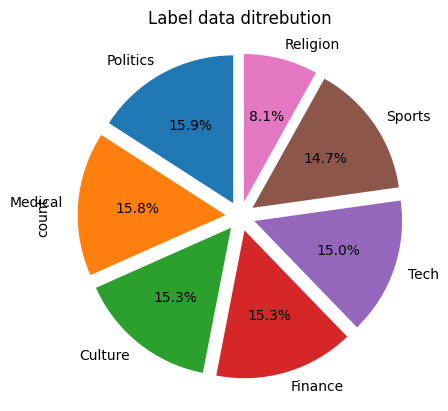

In [11]:
df['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90, explode=(0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1))
plt.title('Label data ditrebution')
plt.show()
# From the following plot we notice that our label are some what evenly ditributed.
# I really wanted to use plotly :(.

<ipython-input-12-5531ac02b799>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')


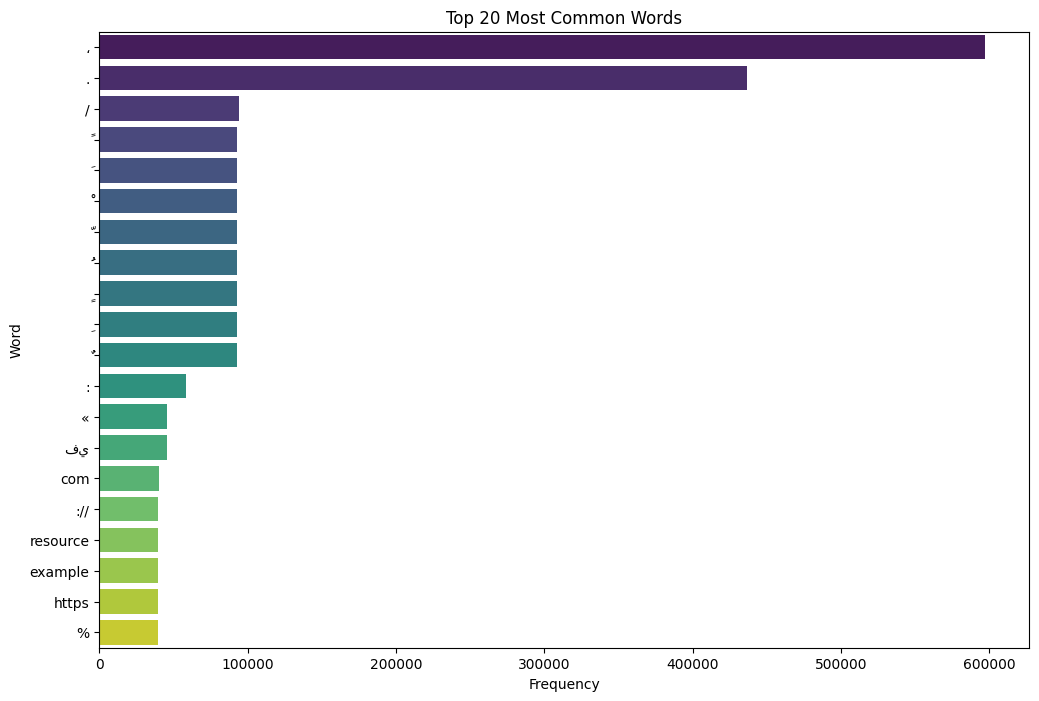

In [12]:
# Let's explore our data set a bit more and check word frequencies:

# Let's plot our data to get more context and understand it:
# Let's get our clean text and tokenize it:
all_text = ' '.join(df['text'])
words = araby.tokenize(all_text.lower())
# Using the counter in collections lib, let's count our words:
word_freq = Counter(words)
# Turn into df to plot:
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot top 20 most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [13]:
# Not really helpfull lol, but it will be after our processing in a bit :)

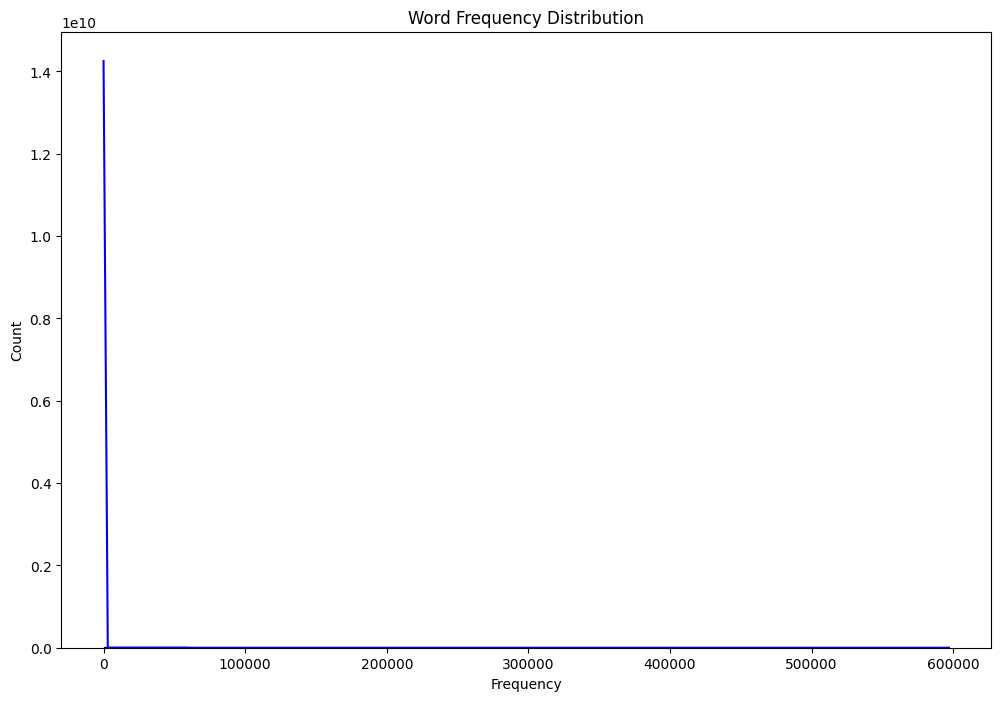

In [14]:
#  Plot word frequency distribution
plt.figure(figsize=(12, 8))
sns.histplot(word_freq_df['Frequency'], bins=10, kde=True, color='blue')
plt.title('Word Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

In [15]:
# We have to read it from left to right sadly.

In [16]:
# Let's normalize and standardize our df by setting a min and max length for our texts:
# Why? Beacuase this will help with noise reduction and more importantly it will help in our embeddings step:
min_length = 150
max_length = 1250
# Apply limitations on our df:
df = df[df['text'].str.split().str.len().between(min_length, max_length)]

In [17]:
st = ISRIStemmer() # Initialize instance of our arabic stemmer.
def clean_text(text):
  # The following will clean our text from urls and english letters:
  #              re.sub(          pattern         ,replace, string)
  cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  # remove english letters:
  cleaned_text = re.sub(r'@[A-Za-z0-9_]+', '', cleaned_text)

  # remove special characters:
  cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

  # remove harakat:
  cleaned_text = araby.strip_tashkeel(cleaned_text)
  # remove tashkeel:
  cleaned_text = araby.strip_tatweel(cleaned_text)
  # remove lastharaka:
  cleaned_text = araby.strip_lastharaka(cleaned_text)

  # Tokenize the words using araby.tokenize:
  words = araby.tokenize(cleaned_text) # This will split our text into tokens (words).

  # After tokenizing let's remove the stop words:
  # Make a set of stop words, then by looping through the whole tokenized text check if the word is a stop word by checking whether if it's in the stop words set.
  arb_stopwords = set(stopwords.words("arabic")) # This will create a set of all arabic stop words.
  filtered_words = [] # This is where we'll save our tokens without the stop words
  for word in words:
    if word not in arb_stopwords:
      filtered_words.append(word)

  # Return our text to it's stem:
  word_stem = []
  for word in filtered_words:  # Apply stemming only to filtered words
      word_stem.append(st.stem(word))

  stemmed_sentence = ' '.join(word_stem)


  # Normalize hamza:
  filtered_text = araby.normalize_hamza(stemmed_sentence)

  return filtered_text

In [18]:
df['clean_text'] = df['text'].apply(clean_text)

In [19]:
# Check wether if it was applied correctly:
df['text'].iloc[0]

'https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً"ْبَعيُدْاًّ عن اٌلسيطرة"ّ ًلِفرقةَ مَسّرُحَ ًاِلطِاٌئف،ّ ْمن ّتٌأٌليُف فُهًدِ ّرّدِةَ الحاّرثي، ّوٌإُخراًج َسٍاٌمَي ًصّاَلٍحٍ الزَهرانيّ،ْ ٌوُذّلكّ فٌيً َرٌابعٍةٌ ٌليالي ِالدورْةَ اَلأوٌلى ٌمن مًهرًجِانٌ اْلشْارِقُة لّلّمَسُرٌحْ الخليجي ٌ.تًبًدَأْ اْلْمسرٍحيٍة بثًلاٍثّة َأشخاٍصٍ ٍيجٍلْسِونَ ُفي قاعةِ مّكتبةِ،ٌ ًيِنهمُك كٌل َمْنهٌمٌ ّفي ُالقرِاءة بْشغَف،ِ ُثُم يبِدأِوْن ًفيَ الٍحوٌاُر لنٍكُتشُفُ ُأِنهمّ كاْنوّاٌ ْيِقُرَأّونْ ِروٍاياّت لُأستُاّذهم ًالكِاتِب اّلمٌبدَعَ ُالٍذيٍ مِاْت ُوْتِرْك ُرِوايٌاتَ فريَدَةً،ٍ ُرٌسم فْيهًا ِشْخُصًياُت ٍغاية فُي الُدُقٌة، ٌويتحدٌثونّ ْعنُ ضرورة تكِرٍيمَ ِأستْاّذُهًم،ٌ ويٍتِفِقون ُعُلْىّ طرٍيقّة ًخاصةّ َلًلتكرّيم وُهيٌ ِإُخرٍاّج ُشِخصِيٌاتَه ًمنُ ْرِواياٍتها ٍلٍتَعٍيٍش في ّاٍلوْاقًع، وِيًنتِقّونً شِخُصيًاتٌ مركزيُة، ٍأْولها ْاُلحِلاق ٍاٍلذي ٍكٍان ًطَيًبًاًُ،ٌ حْافٍظاً لأُسرّاٌر 

In [20]:
df['clean_text'].iloc[0]

'حمد ولد حمد سالمعرضت اول خشب سرح قصر ثقف شرق سرح سعد بعد يطر فرق سرح طءف ءلف فهد ردة حرث ءخراج سمي صلح زهر وذل ربع ليل دور ولى هرج شرق سرح خلج بدء سرح ثلث شخص جلس قعة كتب نهم نهم قرء شغف بدء حور كتشف نهم كان قرء روي ءستاذ كتب بدع مات وتر روي فرد رسم شخص غية دقة حدث ضرر كرم ساذ تفق طرق كرم وهي خرج شخص ريا تعش وقع نتق شخص ركز اول حلق طيب حفظ ءسرار اهل الح وكان جمع يحب وحن يكون شخص لده دفع قبل حلق فءن طلب بشء خرج حفر قبر قبر جمع ردد داء دنا فني وءن بقء لله وحد خرج شاب محب ظل سنو طول حمل ورد نظر حبب رحل عنه ولم تعد اله مات ءخذ طلب ساذ شخص علم جدد تعش كتشف حور شخص علم جدد تغر ءصبح شخص خرى شرر مرد رفض عود روي خرج ءصبح كان روي ثغر تخل برا ساذ يحر طلب طرق يعد شخص مكن قرح احد عدت عنف اخر يرد شخص ذقت طعم حرة ولن تطع اية قوة عدت سجن روي وهن قرر طلب دخل ثلث روي يسد فرغ خلف شخص تمرد ظهر وجه كان كتب بدء دخل الي وهم يوص جمهور قءل قبض شخص دعو هرب نكم تعد فكر عاد شخص رءي سطر جعل تعش وقع غار فكر دبي رءج حدث شخص شكسبير نجب حفظ وغر وهي عمل جمل لءن ثير فتح باب فكر غار حسب كتب خرج قحم لتل جرب ءعد فكر شخص ر

In [21]:
df['text'].iloc[1]

'https://example.com/resource/اَنِطٌلقّتَ ٍفٍيّ مثلَ َهًذَه ّالأيِامٌ َمنْ الُعًاْمَ ًالًفائت ٌفعُالْيِاِتَ مهرجاًن دٍبًيُ ًلَمسرٍحٌ ْاَلْشِبّابً،ّ تحت ْمّظًلٌةْ مْجلُس دبي ٌاِلثٌقافي، ْوًكانٍت فكّرة ُالمِهرجان ّتْهدفّ الٍى ْتْشَجًيًعّ ودعٍم ْالّمٌوْاهب ًالشٌاًبّة ّمن الِفُنٌانين اًلِمٍسَرحًيٌينٍ،ّ ْوُإُتٌاحة ٌاُلَفٌرَصة أَمّامهّم لتّقْدَيُمً ِأّعُمالٍهمَ ًاُلمٍسٍرٍحية أماْمْ اِلجمًهورً،ْ وهوً ماْ يّزّيدّ مًن خبٍرّتٌهٌمُ ْويٌصَقْلَ موهِبٍتهُمْ المسْرَحيَة، ُويُومِ ّ1َ0 ْأٍغّسْطسٌ اّلفائٍتّ ٌاًنٌطلقٌتٌ فعاُلّيات اٌلِمٍهِرجاٍن ّفٌي دْوِرتهْ ّالثاُنَيًة وٌتستٌمٍر ِحٌتْى ٍ20ُ أٌغسَطَسِ/ آبٌ َاٍلجّاريٌ،َ وَلكنٍ ّمٌعٍ ّقٍرٌار ُصاَحًبُ ْاْلسَموْ الشِيُخ ًمحْمد ْبُنً راًشٌد آل ٌمّكّتَومً نَائبٍ ّرٍئيّسُ الًدولة رَئيسّ مجٌلٍسً ْاّلوزَرٍاَءْ حّاكٍم دّبي،ُ بإنُشّاُءُ هيئة دبُي ًللثَقاّفةٌ واْلّفنونْ ٌتحّوَلُتُ رّعُايُة اٍلٌمّهِرجّان ُاّلّىْ الهيئة التي ِتّسعّى اْلى ٌالًمْساّهمْة ٍفي الحيَاةِ ٌالْاٌجُتٌماعيٌة وًالفّكٌريٍة ْوًالثقاِفيْة ِفٌي دولة ُالٍإًمًارْاْت، ُوترسيٍخ مًكانة ّدًبي كٍمٍقْر ًحيّوّ

In [22]:
df['clean_text'].iloc[1]

'ايم عام فءت فعل هرج دبي سرح شبب ظلة جلس دبي ثقف وكانت فكر هرج هدف الى شجع دعم وهب شبة فنن سرح ءتح فرص امم قدم عمل سرح جمهور يزد خبر صقل وهب سرح ويم 10 فءت طلق فعل هرج دور ثني سمر 20 جري قرر صحب سمو شيخ حمد بن رشد ال كتم نءب رءس دول رءس جلس زرء حكم دبي ءنشاء هيء دبي ثقف فنن تحل رعي هرج الى هيء سعى الى سهم حية اجتماعية فكر ثقف دول امر رسخ كان دبي كمقر حيي ثقف فنن راثوقد وضع هيء دبي ثقف فنن استراتيجيت ثقف شمل همي حفظ هوة وطن خلل عزز وعي نشط ثقف تعا ءسس عنة دول شرك نشط فعل هيء والتي برز هرج دبي سرح شبب قدم لءن هيء تءم ضرر يظل سرح يقم بدر عضي حيي حرك جمع ثقف سهم وعي انس ءدر لذت وقع جمع وطنهوتسعى هيء الى دعم شجع جيل سرح شاب امر خلل شرك فعل سهم روج نتج ثقف فني خصص كان وصل الي سرح امر ستي خلج عرب طلب نظر بمسءولية الى همي وجد جيل سرح شاب وهب فنا فكر يست سير حفظ ستى حقق جيل فصل ربع قمةوالمتابع فعل هرج دبي سرح شبب بدء عرف خلل عرض سمء شبة جال مثل ءلف خرج ءصبح سمء ءلف حمد حمد وعبدالله ظهر خلد علي ربع حمد حمد نال بن عمرو مرو عبدالل صلح وهم جمع عمل جال خرج وقد لمذ ايد كوكب خرج مرا جيل فصل وقد برز خل

In [23]:
# Well it was applied correctly but sadly as we can see even with the PyArabic library creators,
# initiative to help with the Arabic nlp scene it still lacks correctness since Arabic is a very complex language.

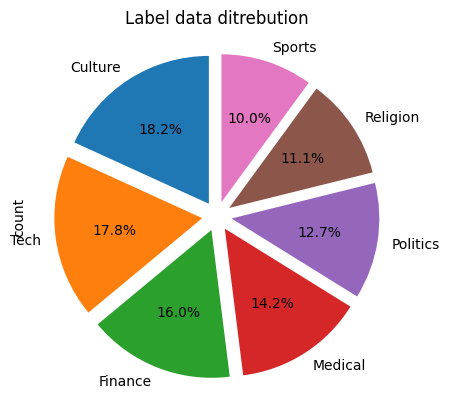

In [24]:
df['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90, explode=(0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1))
plt.title('Label data ditrebution')
plt.show()
# We notice that the Religion label took a big hit after ou preprocessing, most like due to text length

<ipython-input-25-05d1e7cf37eb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')


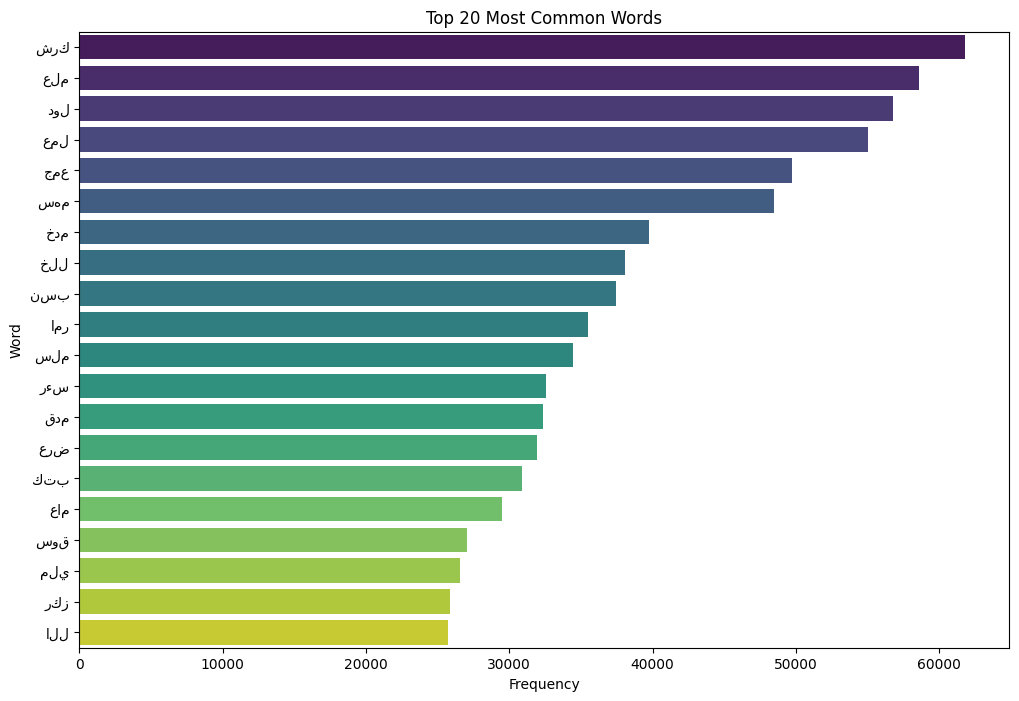

In [25]:
# Plots after preprocessing:

# Let's get our clean text and tokenize it:
all_text = ' '.join(df['clean_text'])
words = araby.tokenize(all_text.lower())
# Using the counter in collections lib, let's count our words:
word_freq = Counter(words)
# Turn into df to plot:
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot top 20 most common words
# I reallly want to use plotly but I can't :(.
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

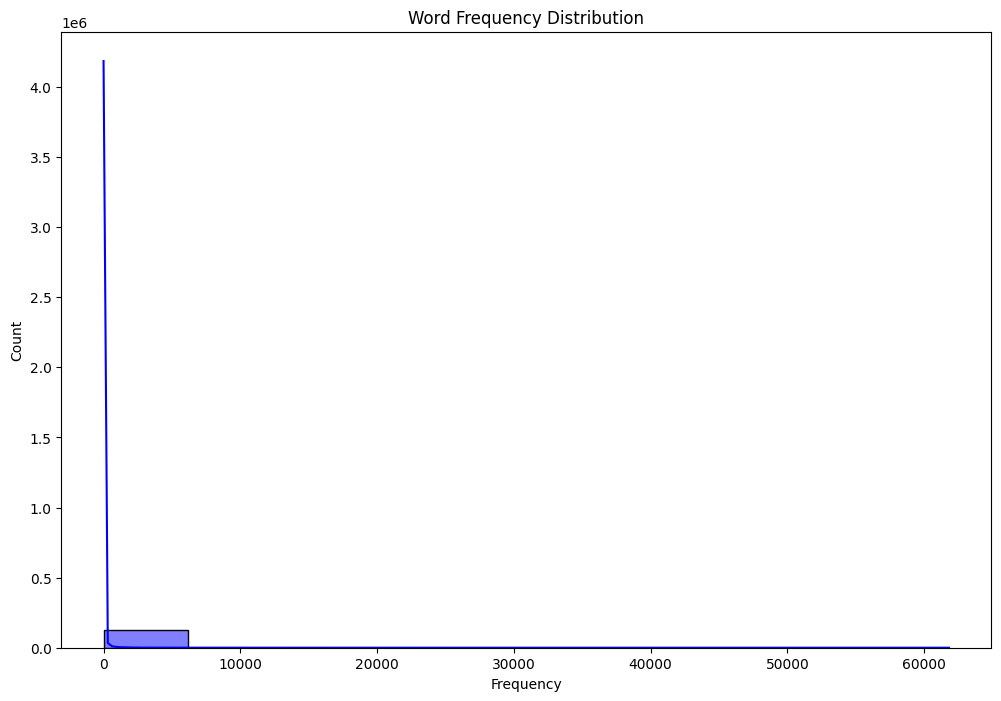

In [26]:
#  Plot word frequency distribution
plt.figure(figsize=(12, 8))
sns.histplot(word_freq_df['Frequency'], bins=10, kde=True, color='blue')
plt.title('Word Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [27]:
# The keras tokenizer tokenizes and transformes the tokens into a unique integer and adds a feture based on the word frequency.
tokenizer = Tokenizer()
# Fit the tokenizer on our processed feture
# This step builds the word index and counts word frequencies
tokenizer.fit_on_texts(df['clean_text'])

# Convert each text document into a sequence of integers:
sequence = tokenizer.texts_to_sequences(df['clean_text'])

# With padding we ensure that all sequences have the same length, which is required for feeding data into most NN:
padded_sequences = pad_sequences(sequence, maxlen=max_length, padding='post')

# Preprocess our target feature:
le = LabelEncoder()
encoded_labels = le.fit_transform(df['label'])
# Split our data into train, validation and test:
train_val_data, test_data, train_val_labels, test_labels = train_test_split(padded_sequences,encoded_labels, test_size=0.2, random_state=101)
train_data, val_data, train_labels, val_labels = train_test_split(train_val_data, train_val_labels,test_size=0.15, random_state=101)

In [28]:
train_data.shape, train_labels.shape

((18924, 1250), (18924,))

In [29]:
val_data.shape, val_labels.shape

((3340, 1250), (3340,))

In [30]:
test_data.shape, test_labels.shape

((5567, 1250), (5567,))

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [31]:
# Model 1:
model = Sequential([
    # Input layer:
    Input(shape=(max_length,)),

    # Our padded embeddings layr, where the magic happens:
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),

    Bidirectional(SimpleRNN(32, return_sequences=True)),

    Bidirectional(SimpleRNN(64, return_sequences=True)),

    Bidirectional(SimpleRNN(32)),


    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(128, activation='relu'),

    # Output layer:
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
# Model 1:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1250, 128)           │      16,480,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1250, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1250, 128)           │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,524,711 (63.04 MB)

 Trainable params: 16,524,647 (63.04 MB)

 Non-trainable params: 64 (256.00 B)

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [34]:
batch_size = 64

# Create a TensorFlow Dataset from the training data and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
# Batch the ds:
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [37]:
history = model.fit(train_dataset, epochs=2, validation_data=val_dataset)

Epoch 1/2
592/592 ━━━━━━━━━━━━━━━━━━━━ 421s 710ms/step - accuracy: 0.9557 - loss: 0.1488 - val_accuracy: 0.9284 - val_loss: 0.2535
Epoch 2/2
592/592 ━━━━━━━━━━━━━━━━━━━━ 415s 701ms/step - accuracy: 0.9709 - loss: 0.0987 - val_accuracy: 0.9186 - val_loss: 0.3263


# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

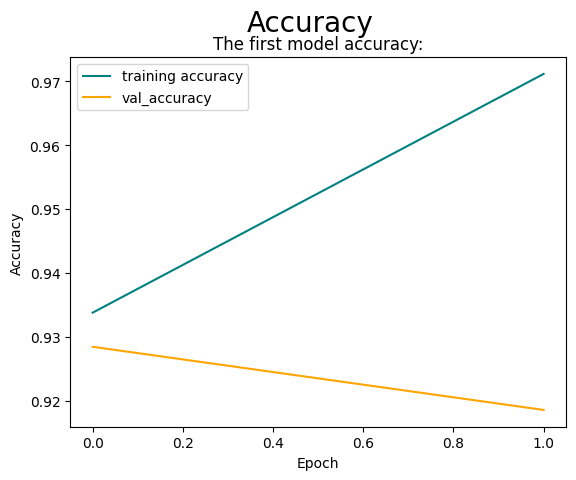

In [38]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('The first model accuracy:')
plt.show()

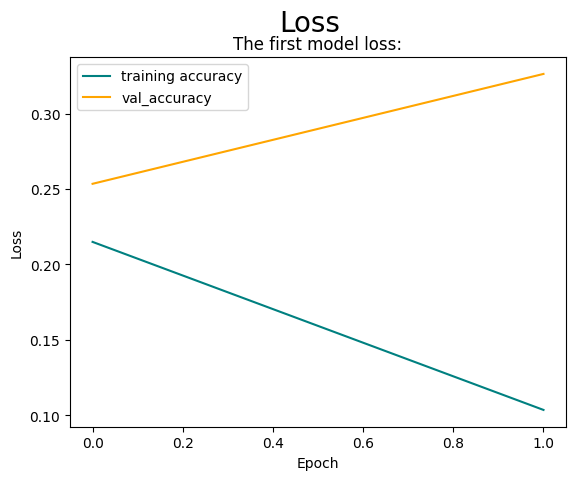

In [39]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='training accuracy')
plt.plot(history.history['val_loss'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('The first model loss:')
plt.show()

In [40]:
results = model.evaluate(test_data, test_labels)
print(f"Accuracy: {results[1] * 100:.2f}%")

174/174 ━━━━━━━━━━━━━━━━━━━━ 44s 255ms/step - accuracy: 0.9200 - loss: 0.2934
Accuracy: 92.19%


In [44]:
test_pred = model.predict(test_data)

174/174 ━━━━━━━━━━━━━━━━━━━━ 43s 249ms/step


In [47]:
# Bofore visualizing we must round the value of our test_pred:
test_pred_classes = np.argmax(test_pred, axis=1)
class_report = classification_report(test_labels, test_pred_classes)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1010
           1       0.97      0.93      0.95       889
           2       0.95      0.95      0.95       779
           3       0.92      0.93      0.93       699
           4       0.94      0.74      0.83       624
           5       0.98      0.93      0.95       559
           6       0.88      0.98      0.93      1007

    accuracy                           0.92      5567
   macro avg       0.93      0.91      0.92      5567
weighted avg       0.92      0.92      0.92      5567



In [49]:
# Using the confusion matrix:
cm = confusion_matrix(test_labels, test_pred_classes)
print(cm)

[[947   6  13   6  15   2  21]
 [  2 825   7   8   0   0  47]
 [  3   6 738   4   1   0  27]
 [  8   5   8 653   8   2  15]
 [123   4   8  21 462   3   3]
 [  6   1   0  10   4 518  20]
 [  4   6   3   4   0   1 989]]


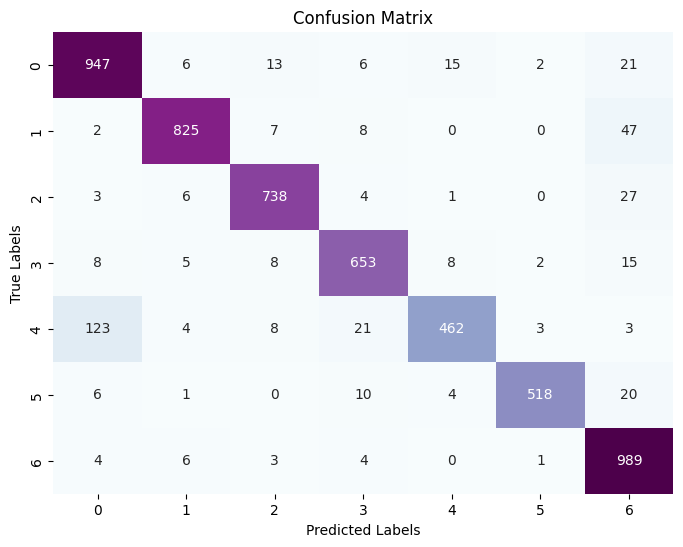

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,cmap="BuPu", fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# The confusion matrix is a very good way to identify the labels that the model confuses.

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [52]:
sample_text = ["من منطلق تطوير الامن السبراني، اطلقت منظمة هيئة الامن السبراني حملة توعوية توضح خطورة عدم تامين المعلومات الالكترونية و الاعتماد على اي رابط او رسالة احتيالية"]
cleaned_sample_text = clean_text(sample_text[0])

# Convert the cleaned text to sequences
sample_sequence = tokenizer.texts_to_sequences([cleaned_sample_text])

# Pad the sequence to match the maximum length used during training
padded_sample_sequence = pad_sequences(sample_sequence, maxlen=max_length, padding='post')
# Predict the label for the padded sample sequence using the trained model
predicted_label = model.predict(padded_sample_sequence)

# Print the predicted label by converting the integer-encoded prediction back to the original label
print("Predicted label:", le.inverse_transform([predicted_label.argmax()]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted label: ['Tech']


In [ ]:
# رائع!!!!

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:



1.   Thanks to the makers of pyarabic the preprocessing steps where clear as per my comments on the preprocessing step.
2.   Due to the nature of the texts im dealing with I had to resorte to making my model more complex but sadly since the computation time for the model was way too long I wasn't able to try different approuches.


3.   As I said in my answer to q2 I had to due to the nature of my dataset
4.   Well, I chose everything I could think of to cover all basis, the one that gives the best outlook of my model's performence is the confusion matrix.


5.   Thankfully not, as we obderve the accuracy of my training and validation and testing too we notice that my model's performence is consistant.
6.   My model isn't doing either, so yeah I wouldn't do much..





